### Plotting Exact Wigner Intracules

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rc('font', family='sans-serif',serif='Sans')
mpl.rc('font', size=16)

In [2]:
def read_intracule(filename):
    file = open(filename, 'r')
    n = int(file.readline())
    comment = file.readline()
    comment += file.readline()
    intracule = np.zeros((n))
    for i in range(n):
        intracule[i] = float(file.readline())
    file.close()
    wdim = int(np.sqrt(n))
    intracule = intracule.reshape(wdim, wdim).T
    return intracule

def plot_intracule(intracule, x0=15.0, title='', suptitle='',
                   savefig=False, plot_filename='plot.png',
                   xlim=[],ylim=[]):
    fig, ax = plt.subplots(figsize=(8,6))
    vmax = np.max(intracule)
    vmin = -np.max(intracule)
    im = ax.imshow(intracule, cmap='bwr_r', 
                   vmax=vmax, vmin=vmin,
                   extent=[0,x0/2,0,x0/2],
                   origin='lower')
    ax.set_xlabel('relative position')
    ax.set_ylabel('relative momentum')
    plt.colorbar(im)
    if xlim == []:
        xlim=[0.0, 5.0]
    if ylim == []:
        ylim=[0.0, 5.0]
    # ax.set_xlim(xlim[0],xlim[1])
    # ax.set_ylim(ylim[0],ylim[1])
    ax.set_title(title)
    plt.suptitle(suptitle)
    if savefig:
        fig.tight_layout()
        fig.savefig(plot_filename, dpi=300)
    return fig, ax

def plot_atom_intracules(z):
    alpha = ['1e00', '1e-1', '1e-2']
    beta = ['1e00', '1e-1', '1e-2']
    ngrid = [128]
    atomdir = 'z_{z}'.format(z=z)
    job_dict = {}
    for a in alpha:
        for b in beta:
            jobdir = 'alpha_{a}_beta_{b}'.format(a=a,b=b)
            grid_dict = {}
            for n in ngrid:
                ndir = 'n_{n}'.format(n=n)
                path='../{atomdir}/{jobdir}/{ndir}'.format(atomdir=atomdir,jobdir=jobdir, ndir=ndir)
                intracule_filename = os.path.join(path,'exact_wigner_intracule.wfn')
                intracule = read_intracule(intracule_filename)
                plot_filename = '../images/{atom}_{job}_{n}.png'.format(atom=atomdir, job=jobdir, n=ndir)
                title = 'Z={z} alpha={a} beta={b} n={n}'.format(z=z,a=a,b=b,n=n)
                fig, ax = plot_intracule(intracule, x0=15.0, savefig=True, 
                                         plot_filename=plot_filename,
                                         title=title, suptitle='Wigner Intracule Plot',
                                         xlim=[0.0,7.5], ylim=[0.0,7.5])

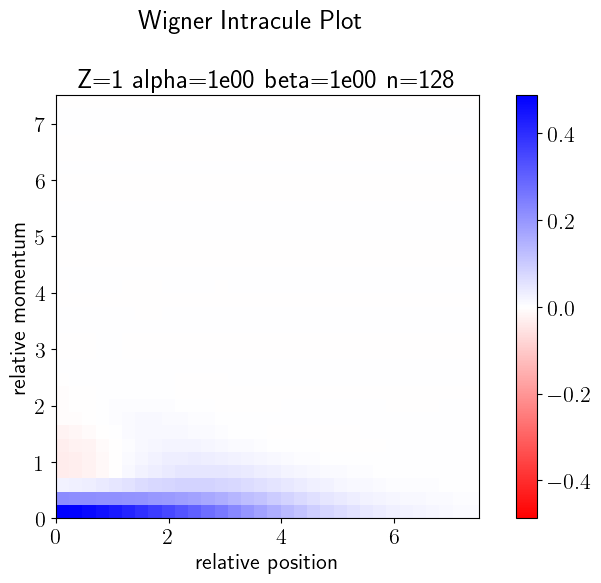

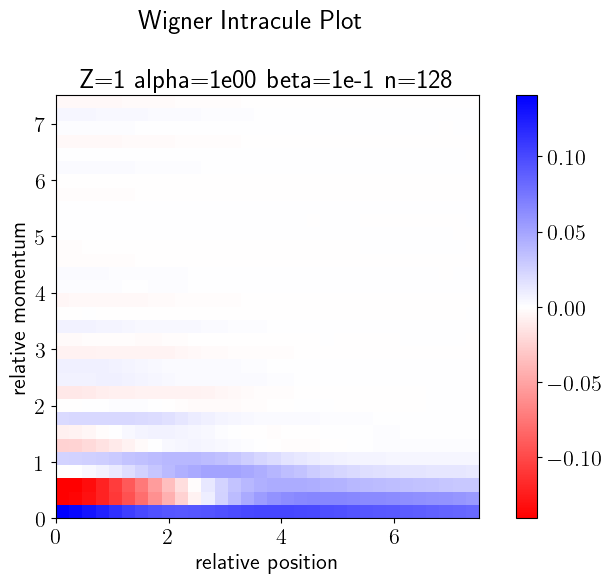

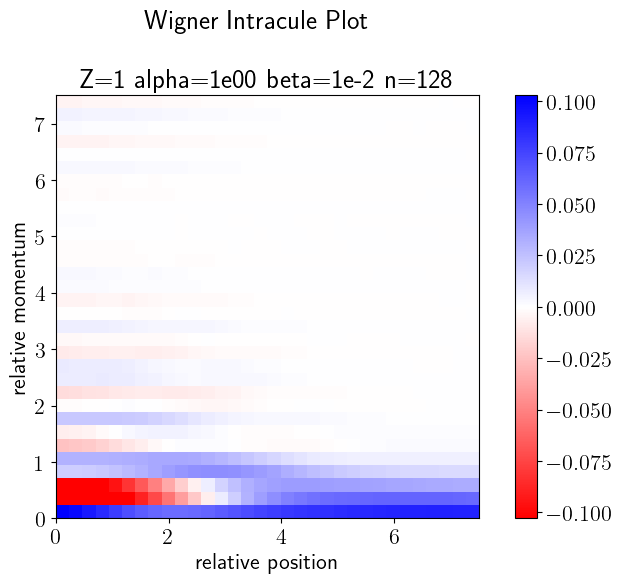

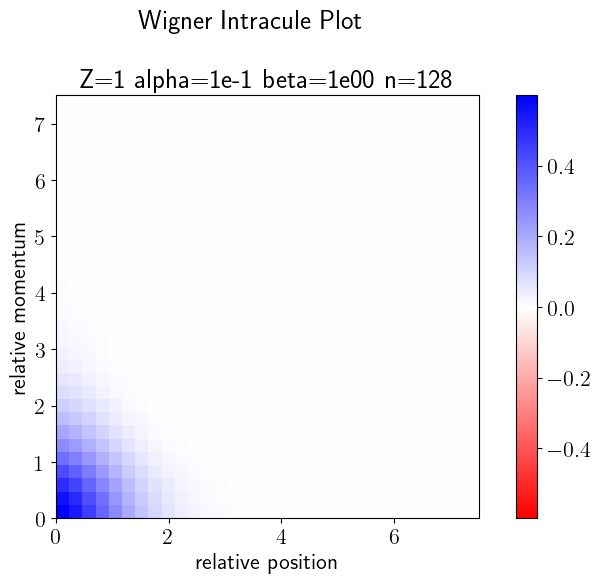

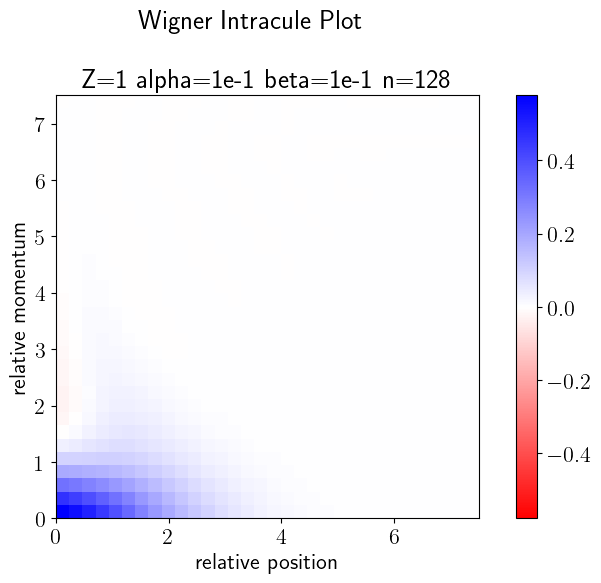

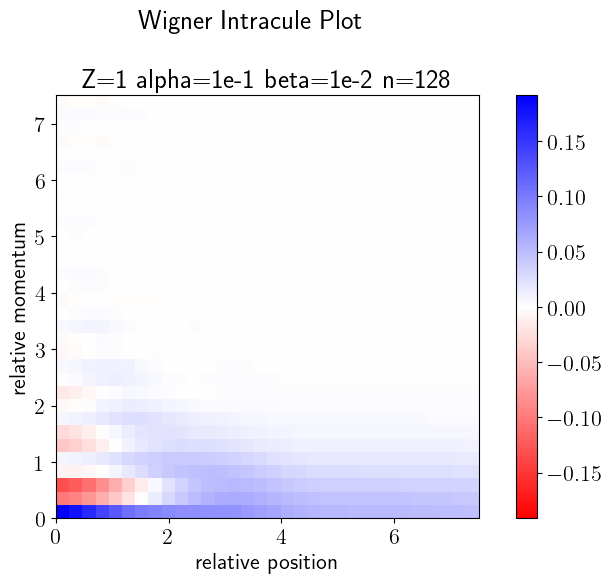

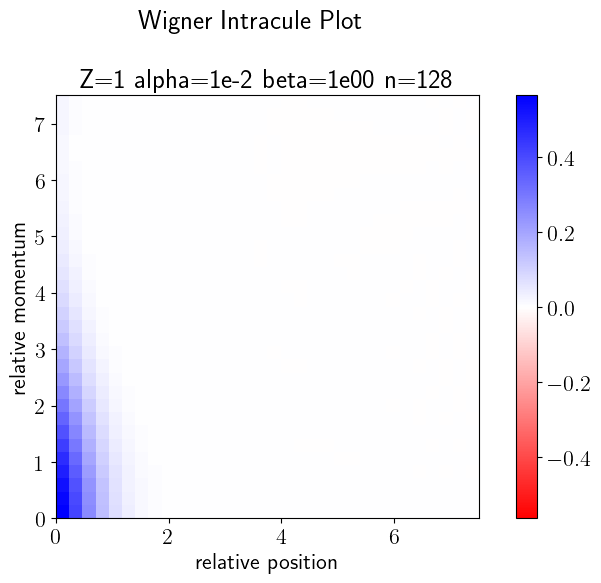

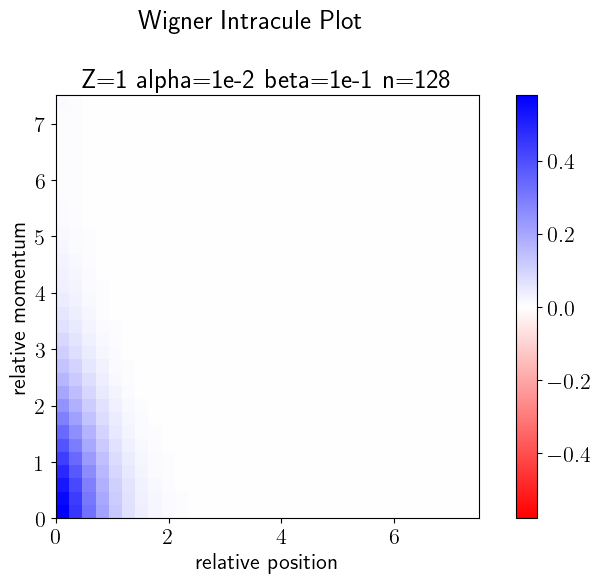

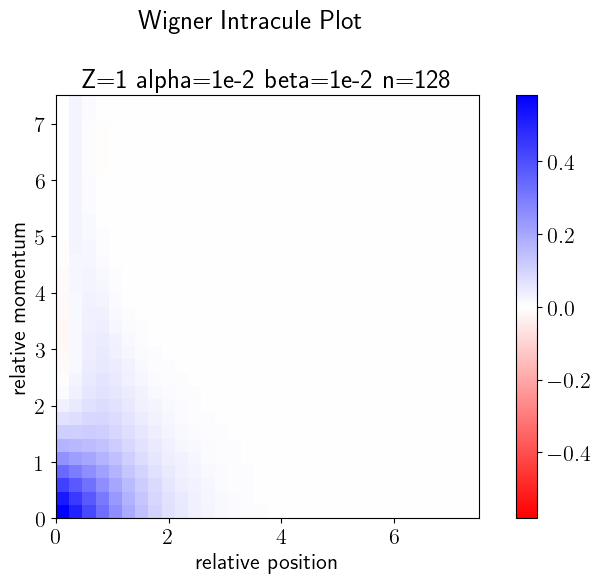

In [3]:
plot_atom_intracules(z=1)

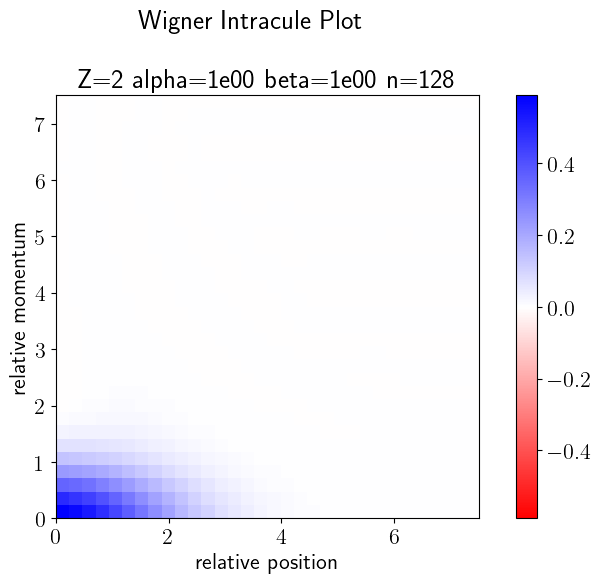

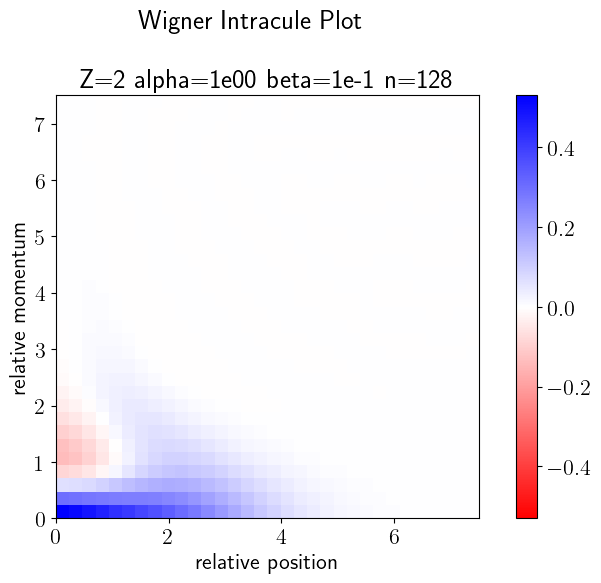

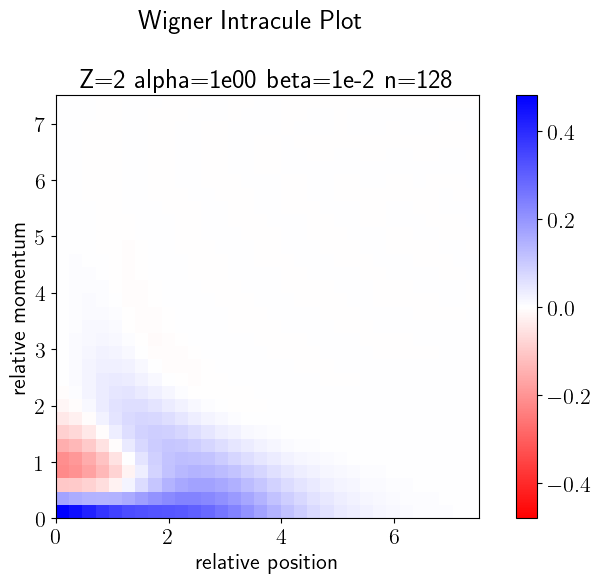

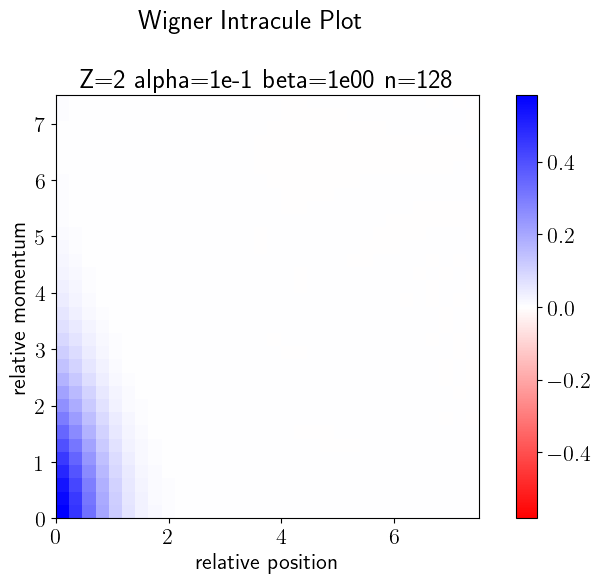

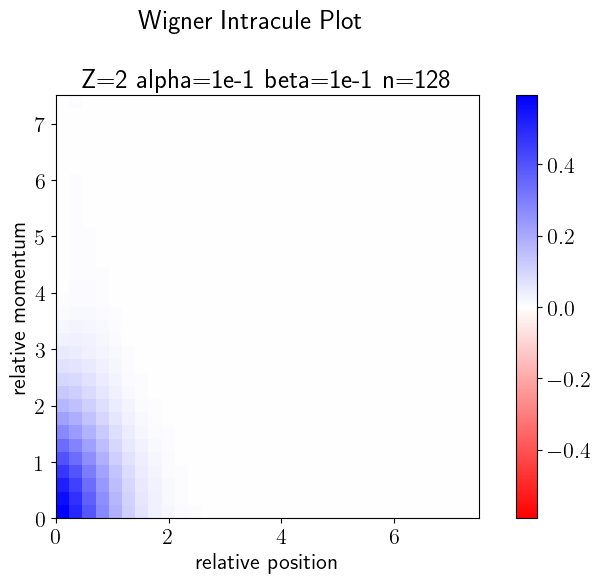

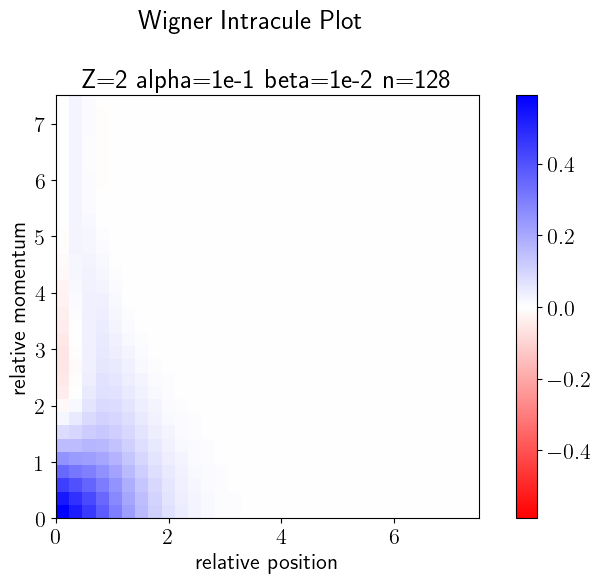

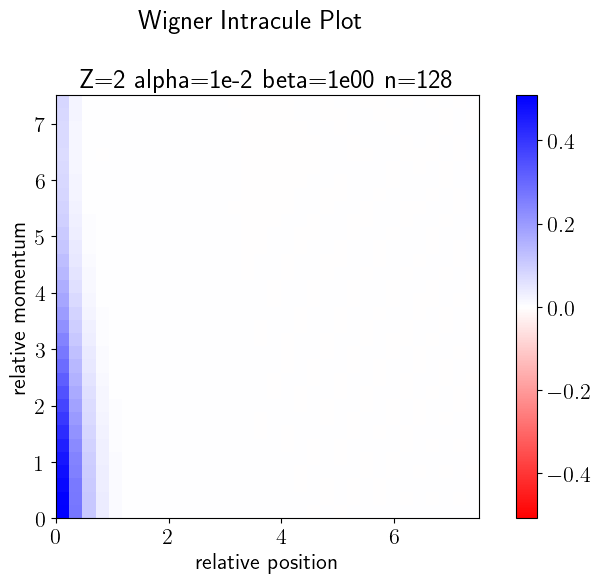

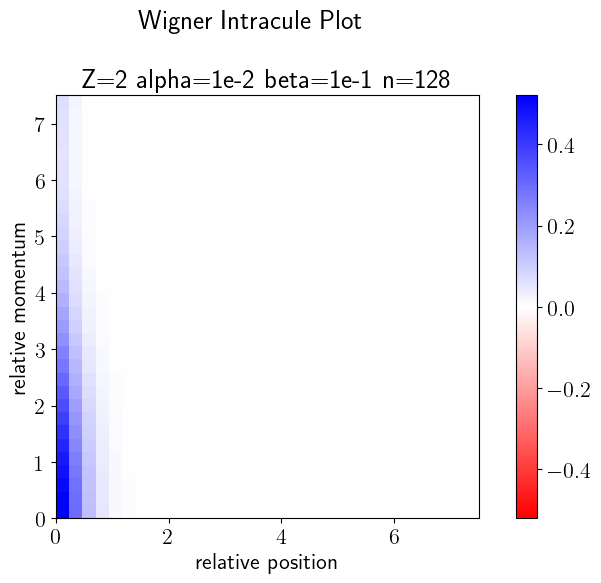

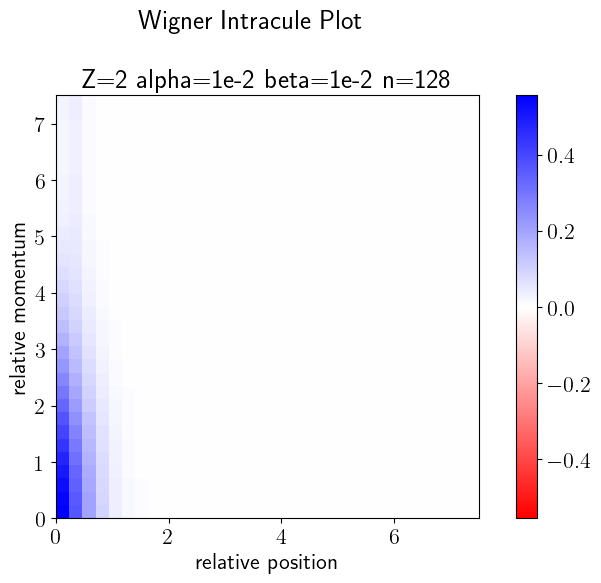

In [4]:
plot_atom_intracules(z=2)

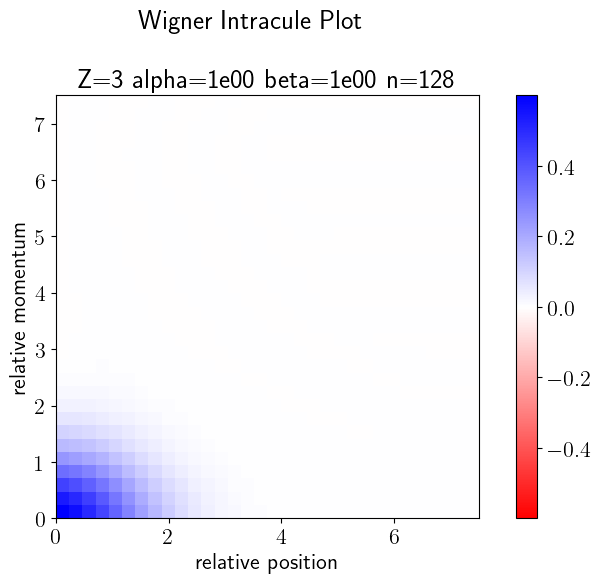

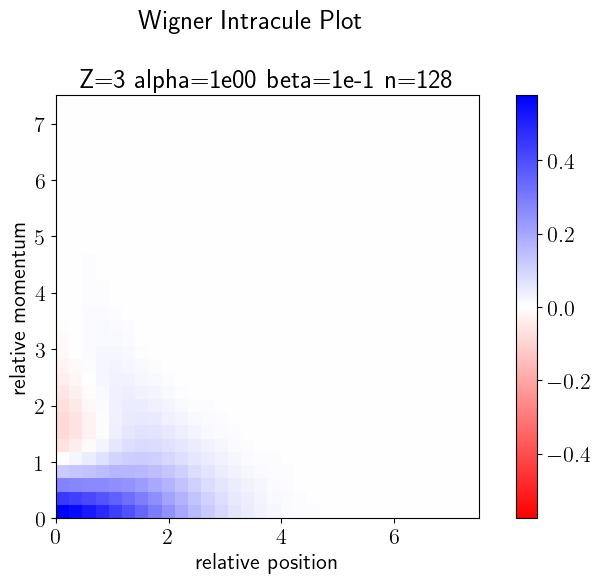

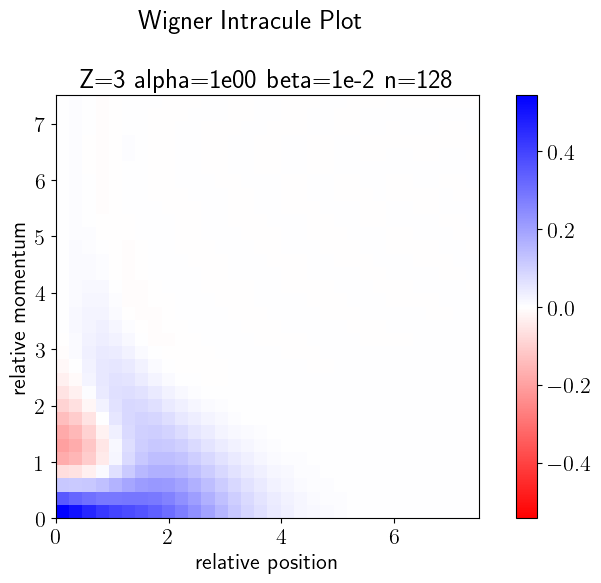

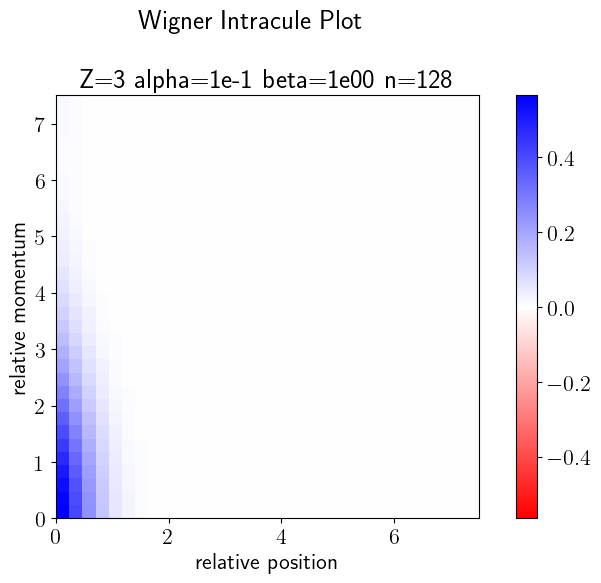

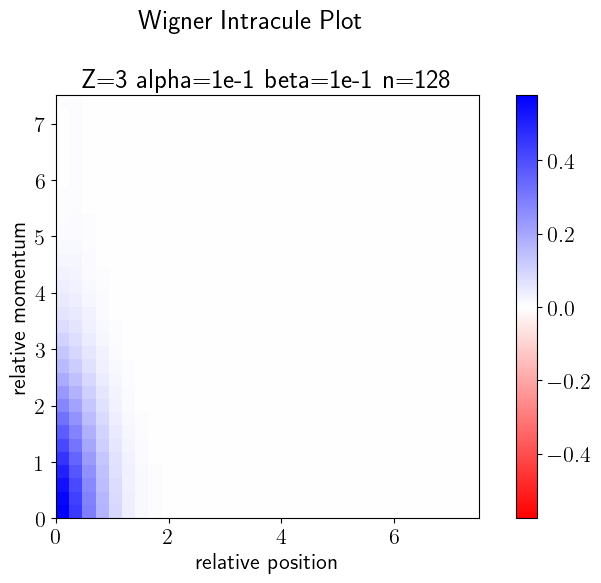

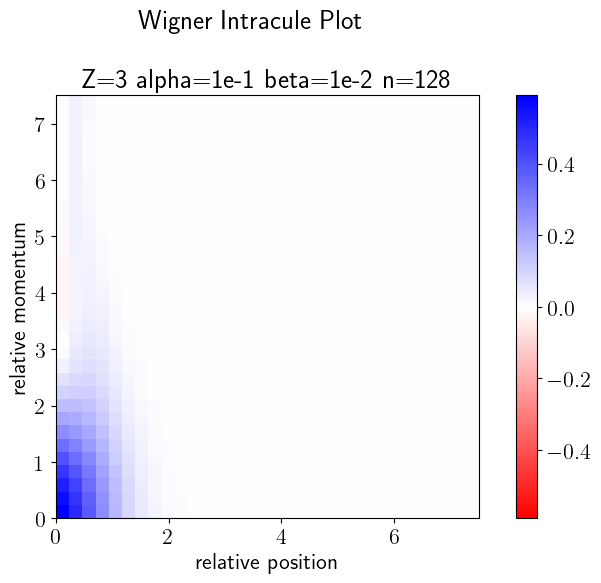

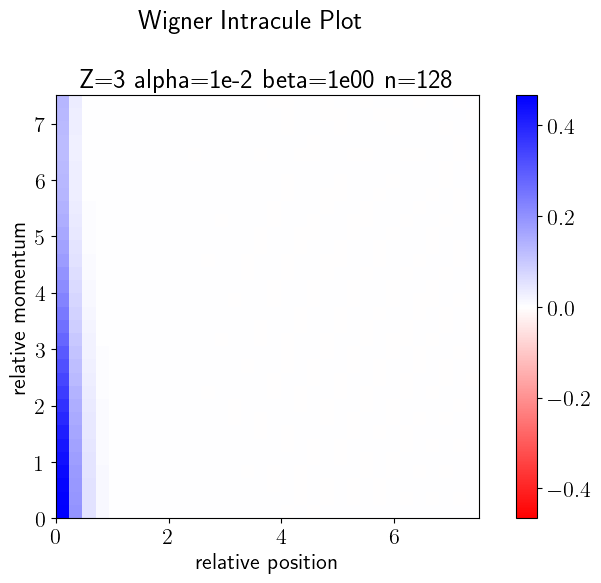

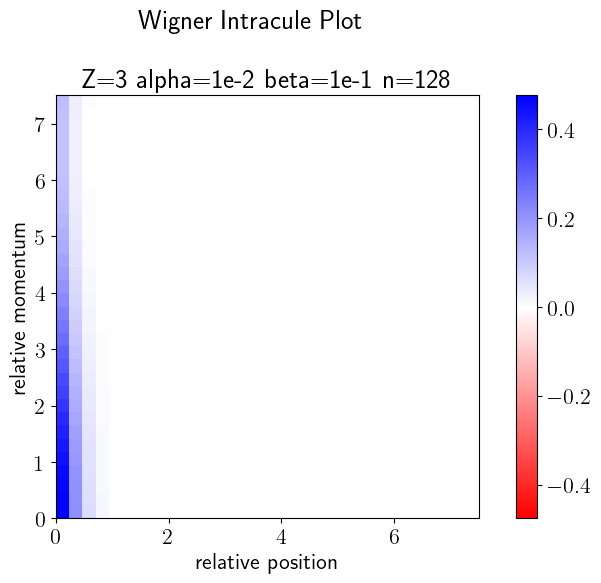

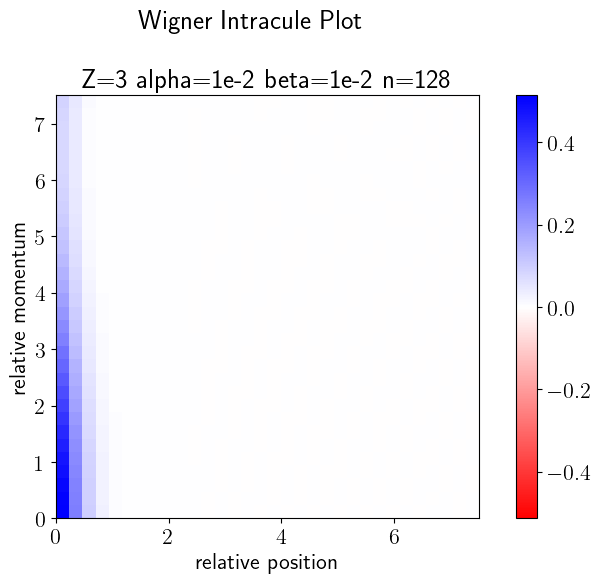

In [5]:
plot_atom_intracules(z=3)

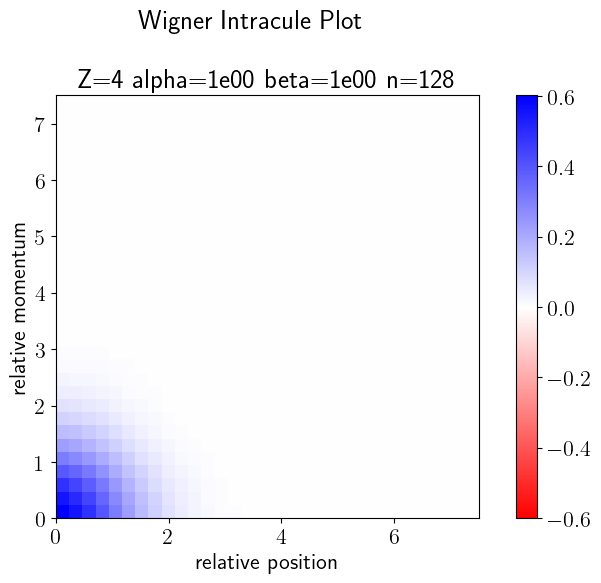

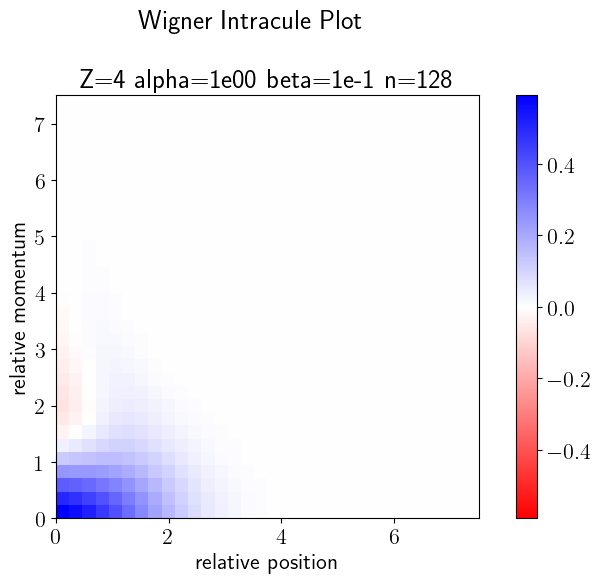

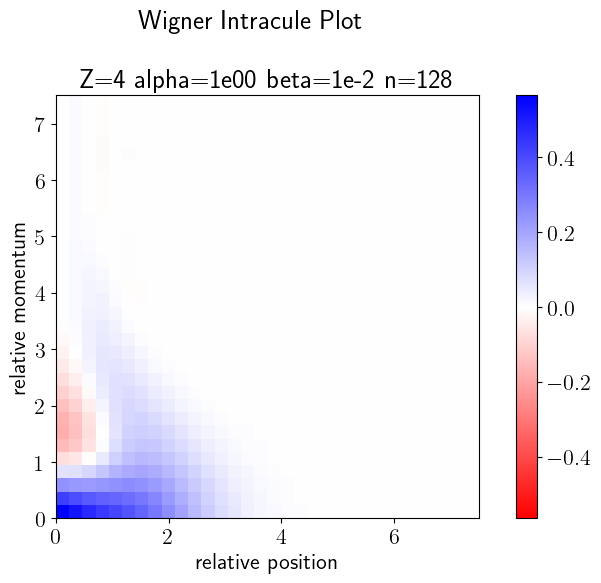

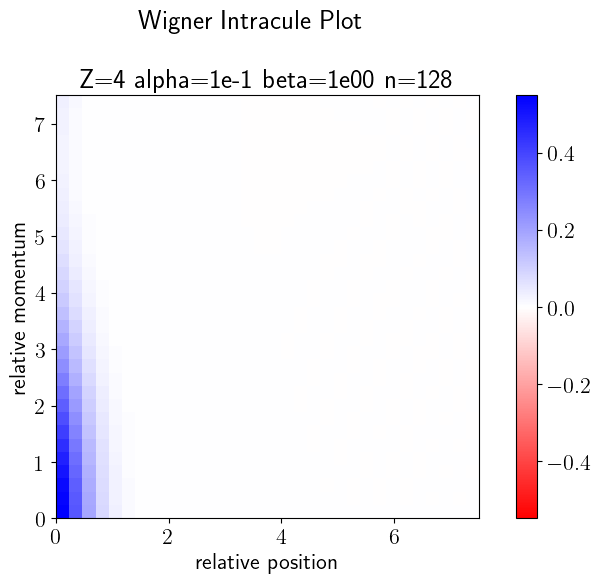

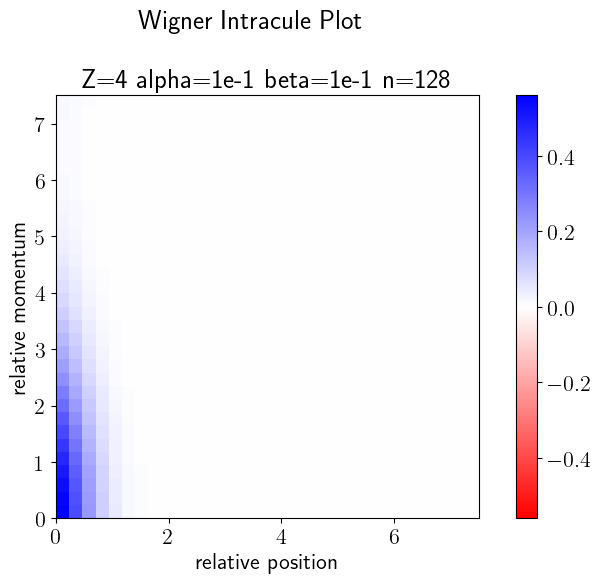

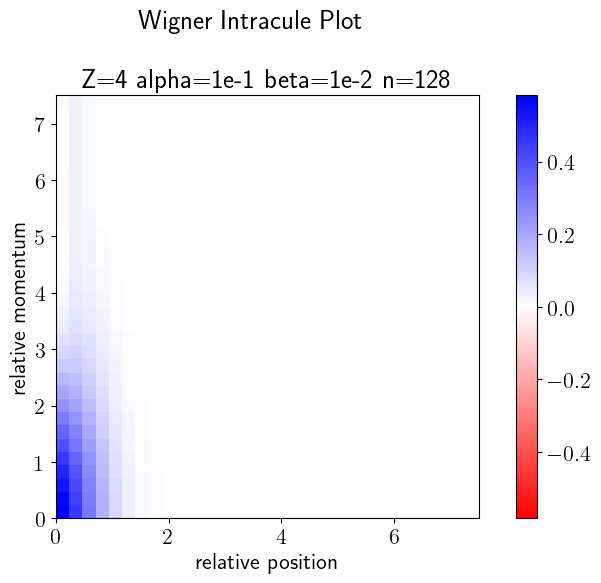

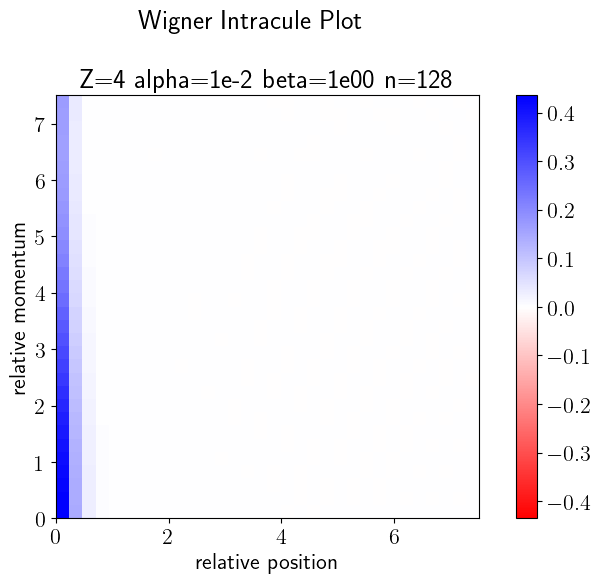

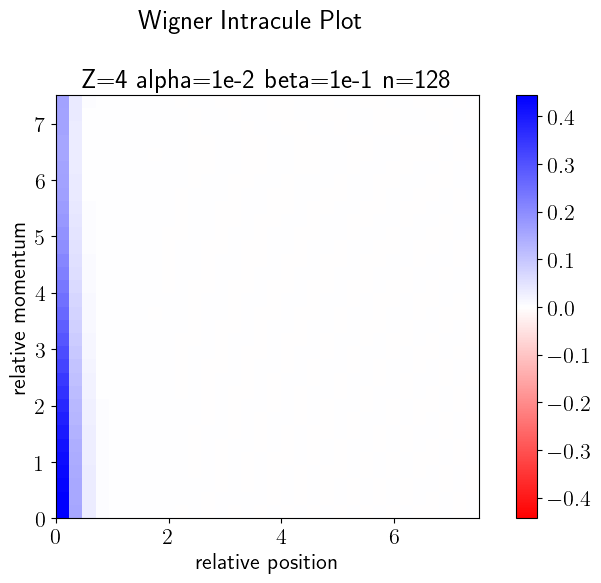

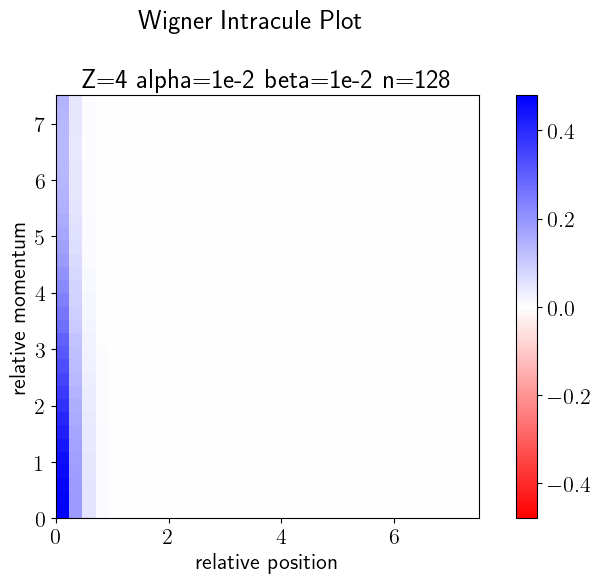

In [6]:
plot_atom_intracules(z=4)

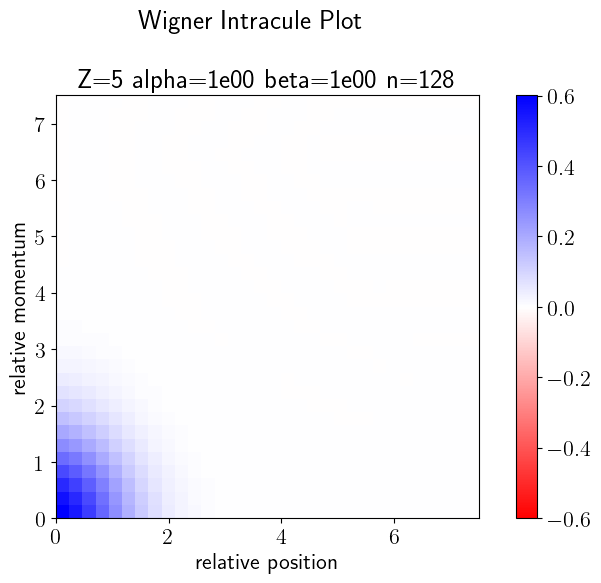

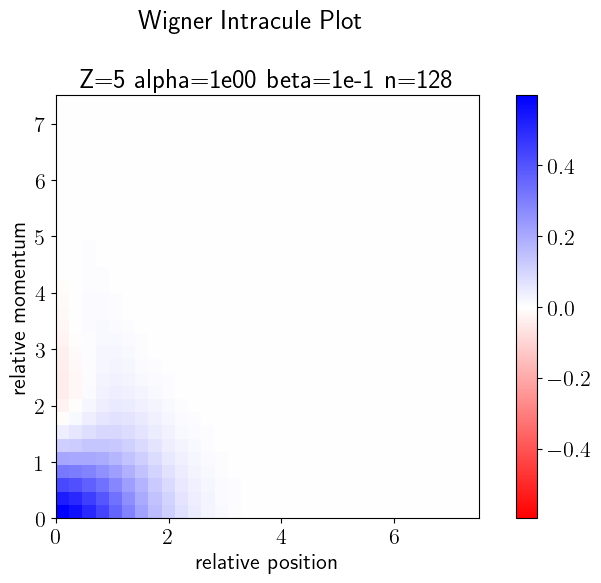

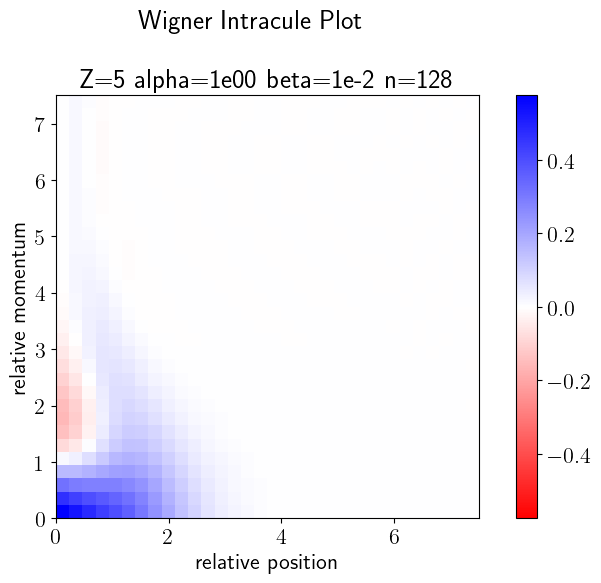

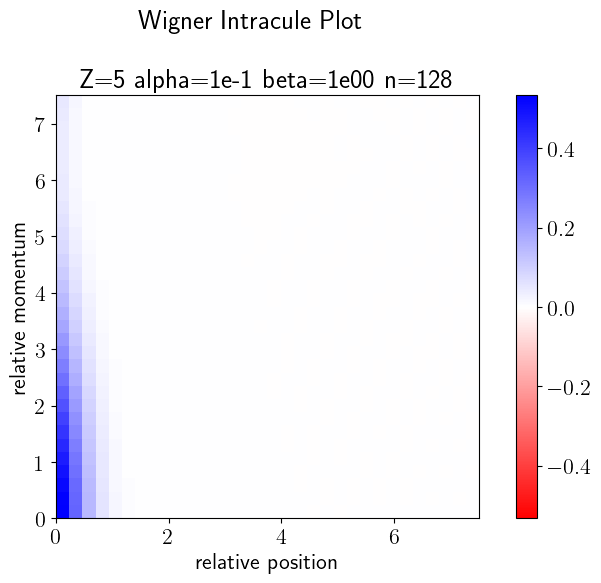

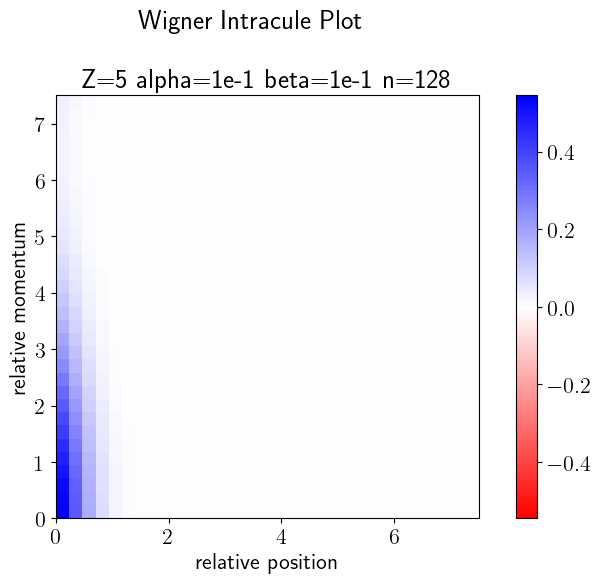

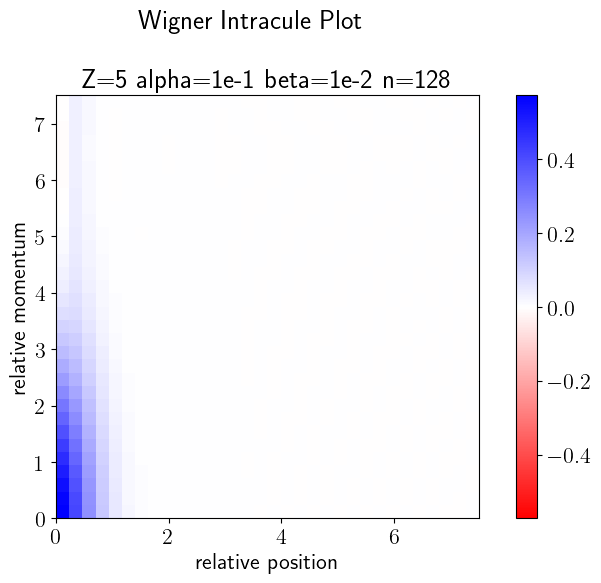

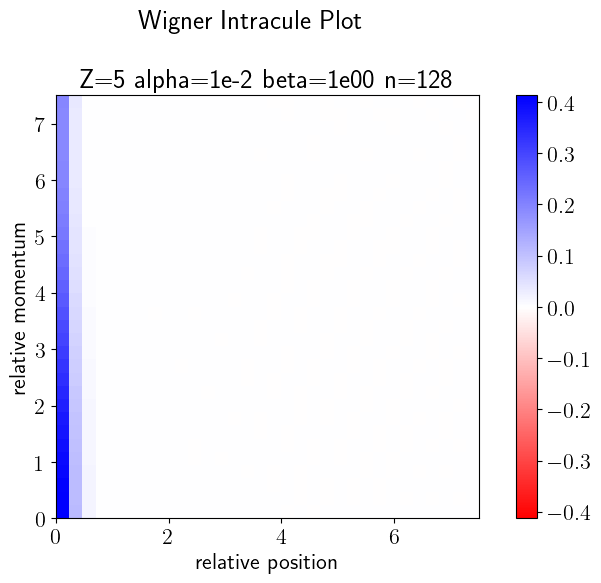

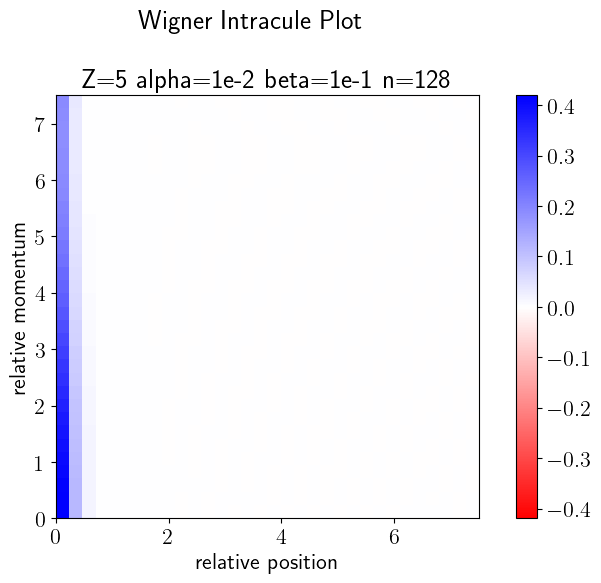

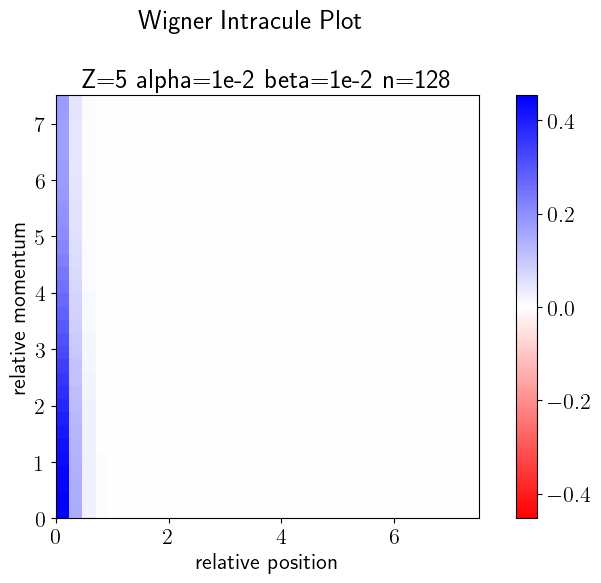

In [7]:
plot_atom_intracules(z=5)

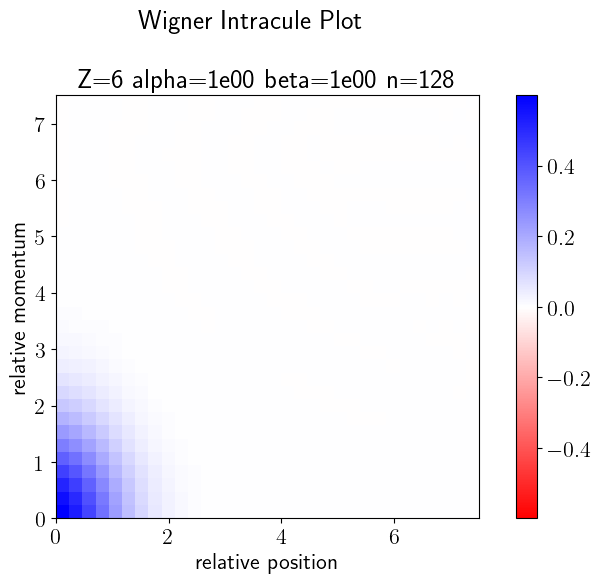

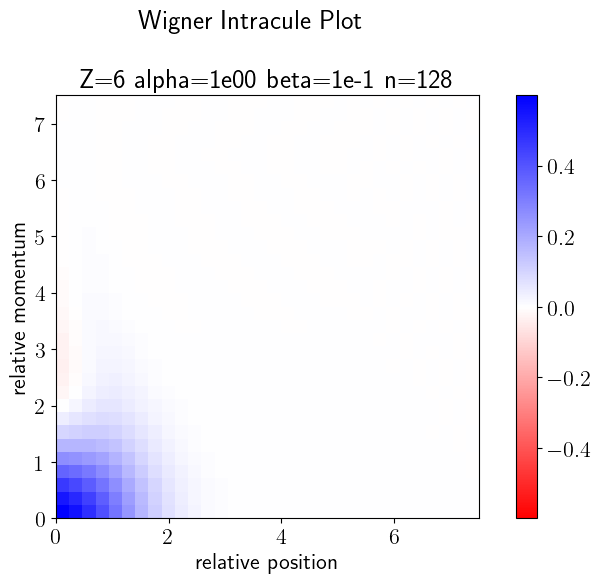

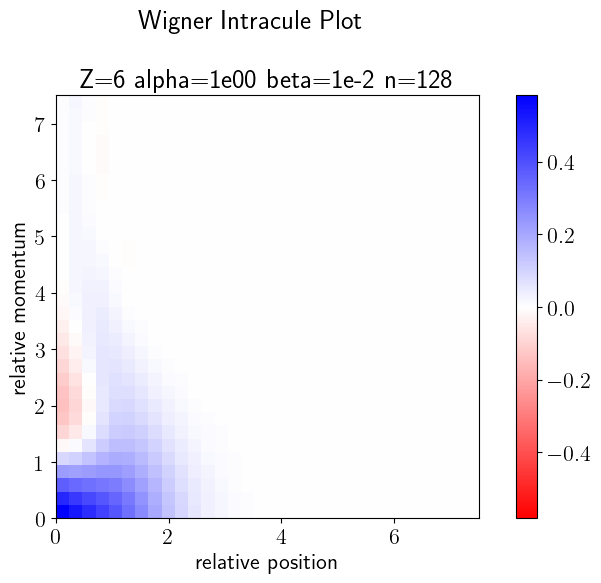

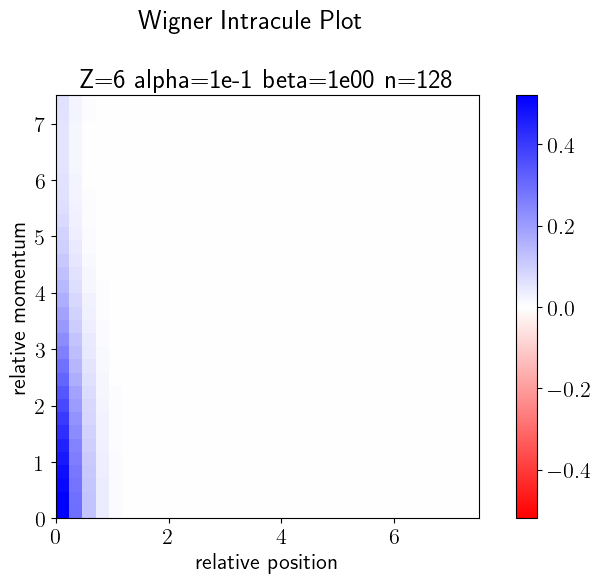

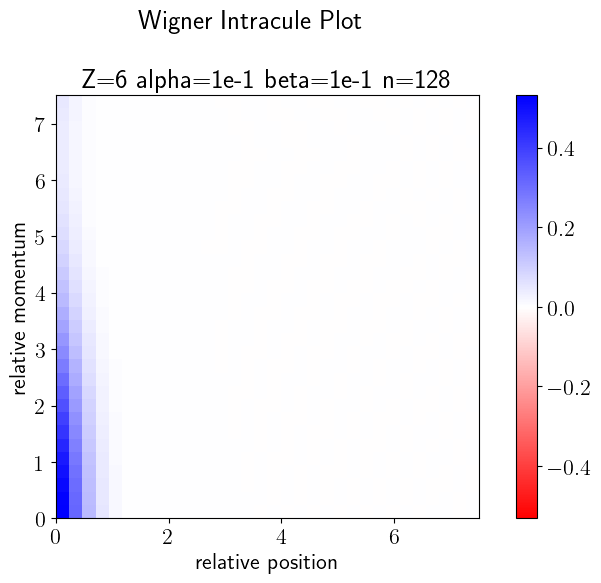

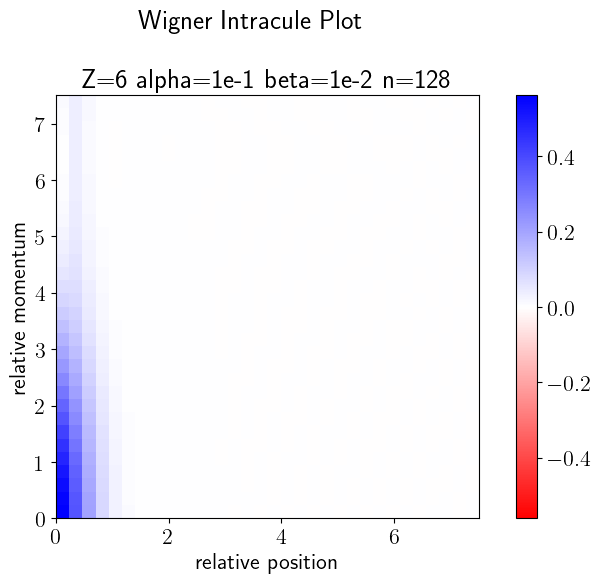

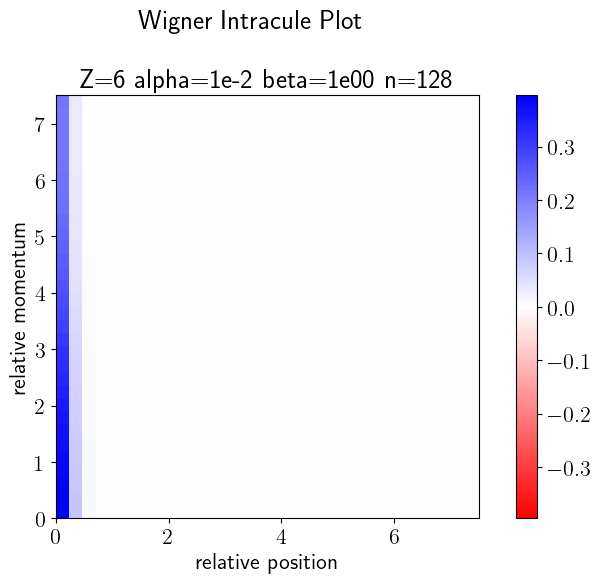

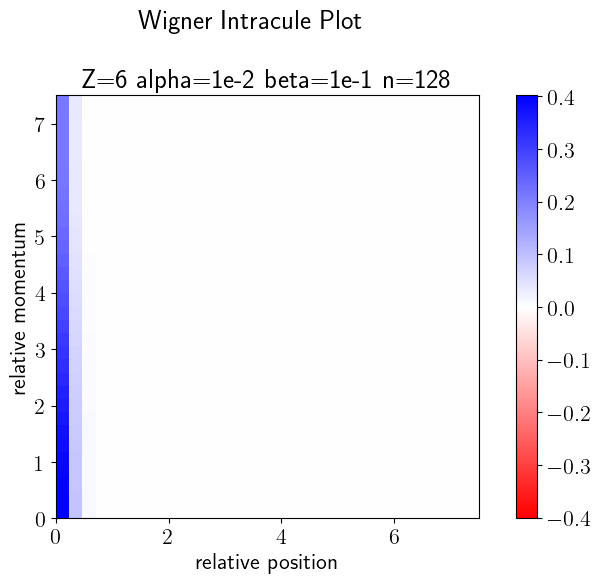

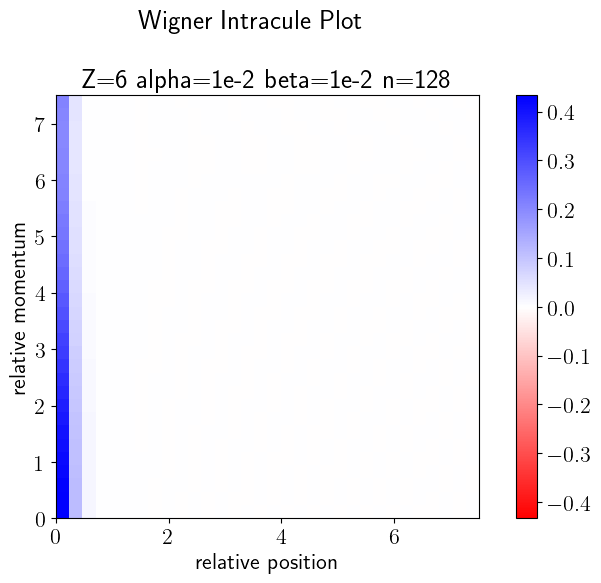

In [8]:
plot_atom_intracules(z=6)